In [1]:
# import needed libraries

import os
import pandas as pd
import numpy as np
import glob
import seaborn as sns
from matplotlib import pyplot as plt
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

In [2]:
# import data

path = "data/"
file_list = [os.path.basename(x) for x in glob.glob(path + "*.csv")]
file_list.sort()

seasons = []

for i in range(len(file_list)):
    temp_df = pd.read_csv("data/"+file_list[i], encoding='latin1')
    seasons.append(temp_df)

del file_list, i, path, temp_df

In [3]:
# convert the line column to string. i previously imported each season manually
# and i believe it was season 8 that was giving a problem with the tokenize command
# in the next cell. 

for i in range(0,8):
    seasons[i]['line'] = seasons[i]['line'].astype("str")
    seasons[i]['line'] = seasons[i]['line'].str.lower()
#    seasons[i]['line'] = seasons[i]['line'].str.replace('[^\w\s]','') #remove punctuation

In [4]:
# tokenize all the words in all lines for all seasons.
for i in range(0,8):
    seasons[i]['tokens'] = seasons[i]['line'].apply(word_tokenize)
    seasons[i] = seasons[i][['name', 'tokens']]
    seasons[i]['season'] = ('S0' + str(i + 1))

In [5]:
for i in range(0,8):
    seasons[i] = seasons[i].explode('tokens')

In [6]:
all_seasons = pd.concat(seasons)

In [7]:
stops = pd.read_table("data/stop_words_english.txt", header=None, names=['stops'])
stops = list(stops['stops'])

In [8]:
all_seasons['tokens'] = all_seasons['tokens'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stops)]))
all_seasons['tokens'] = all_seasons['tokens'].str.replace('[^\w\s]', '')
all_seasons['tokens'] = all_seasons['tokens'].replace('', np.nan)
all_seasons.dropna(subset=['tokens'], inplace=True)
all_seasons['tokens'] = all_seasons['tokens'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stops)]))

/tmp/ipykernel_113625/3671481553.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  all_seasons['tokens'] = all_seasons['tokens'].str.replace('[^\w\s]', '')


In [9]:
sns.set_style('whitegrid')
sns.set_palette('pastel')

In [10]:
all_seasons['tokens'].value_counts()

                56116
house            4519
time             1662
yeah             1654
patient          1646
                ...  
jest                1
warningly           1
prosner             1
prelucasised        1
bodyï½              1
Name: tokens, Length: 26614, dtype: int64

In [11]:
tokens_house = all_seasons[all_seasons.name == 'House']['tokens']
tokens_house = " ".join(t for t in tokens_house)

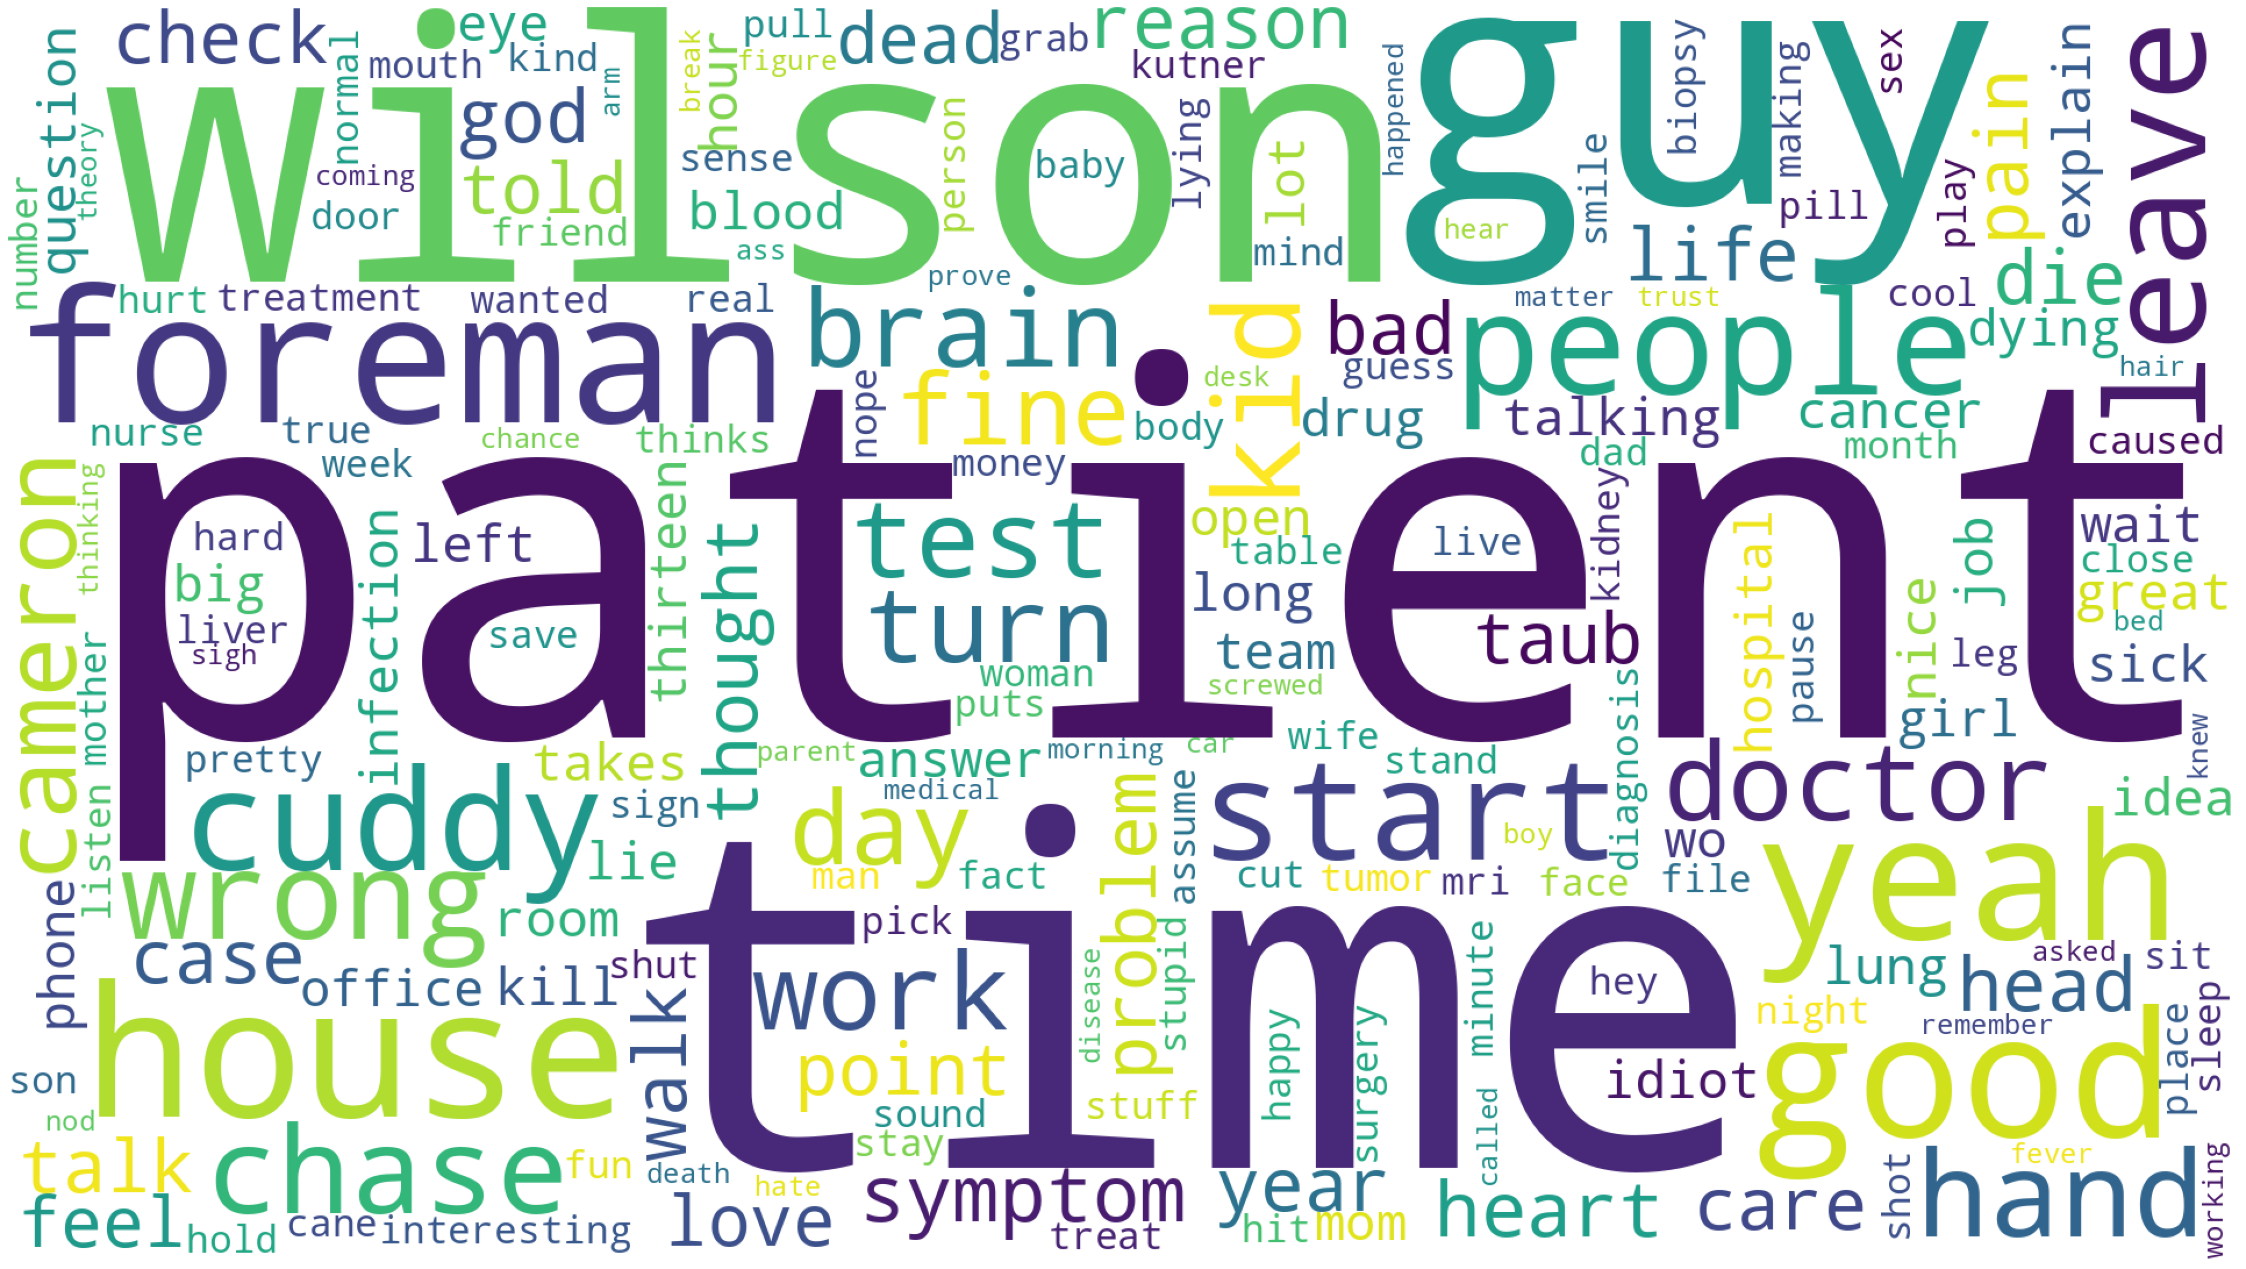

In [12]:
wc_house = WordCloud(background_color='white', width=1920, height=1080).generate(tokens_house)


fig, ax = plt.subplots(figsize=(40,30))
ax.imshow(wc_house, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wc_house)

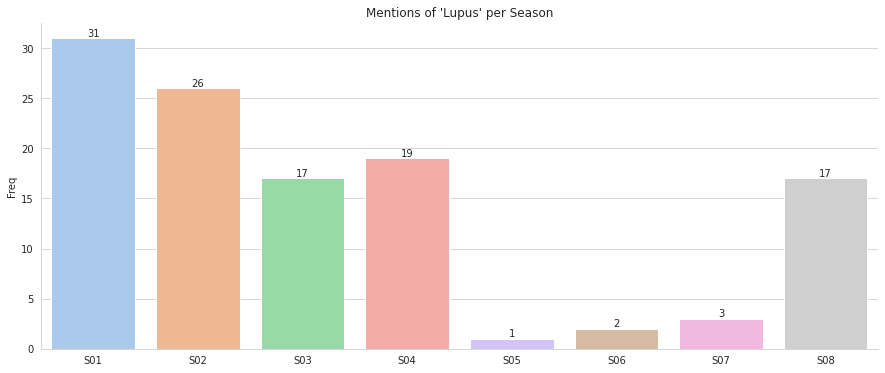

In [13]:
plt.figure(figsize=(15,6))
mps = sns.countplot(x='season', data=all_seasons[(all_seasons.tokens == 'lupus')])
mps.set(xlabel='', ylabel='Freq', title="Mentions of 'Lupus' per Season",
      xticklabels=['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08'])
mps.bar_label(mps.containers[0])
sns.despine()


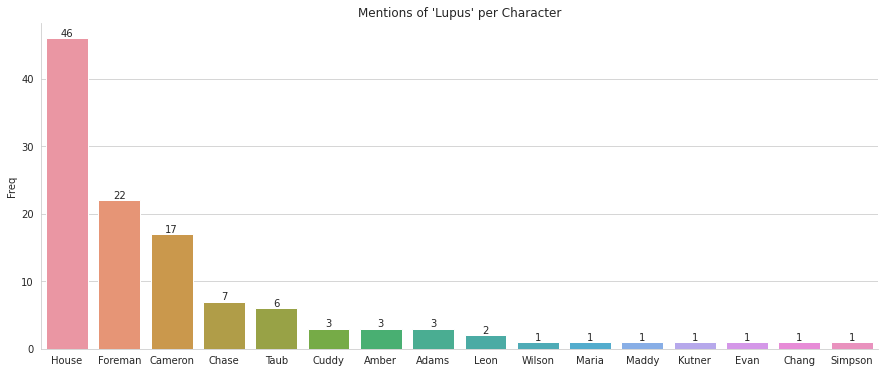

In [14]:
plt.figure(figsize=(15,6))
mpc = sns.countplot(x='name', data=all_seasons[(all_seasons.tokens == 'lupus')], order = all_seasons[(all_seasons.tokens == 'lupus')]['name'].value_counts().index)
mpc.set(xlabel='', ylabel='Freq', title="Mentions of 'Lupus' per Character",
xticklabels=['House', 'Foreman', 'Cameron', 'Chase', 'Taub', 'Cuddy', 'Amber',
 'Adams', 'Leon', 'Wilson', 'Maria', 'Maddy', 'Kutner', 'Evan', 'Chang', 'Simpson'])
mpc.bar_label(mpc.containers[0])
sns.despine()

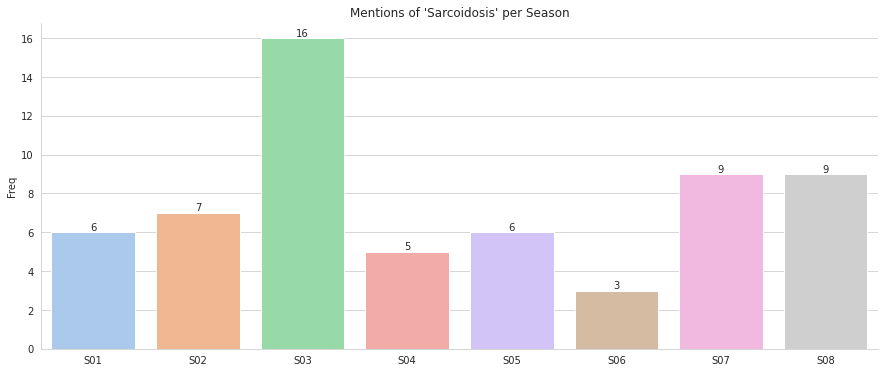

In [15]:
plt.figure(figsize=(15,6))
mps = sns.countplot(x='season', data=all_seasons[(all_seasons.tokens == 'sarcoidosis')])
mps.set(xlabel='', ylabel='Freq', title="Mentions of 'Sarcoidosis' per Season",
      xticklabels=['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08'])
mps.bar_label(mps.containers[0])
sns.despine()


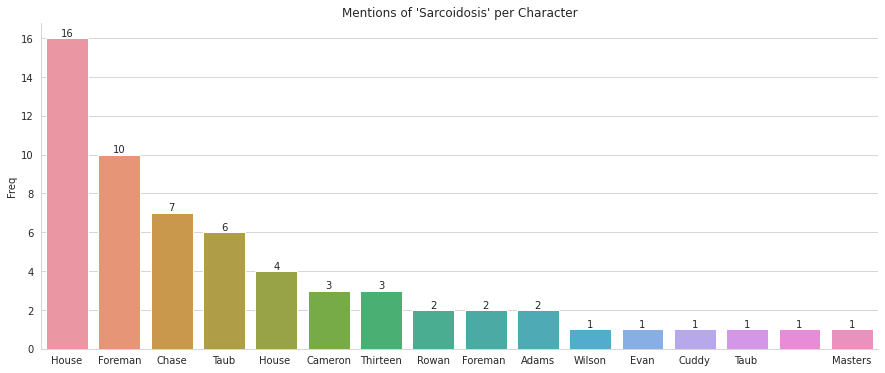

In [16]:
plt.figure(figsize=(15,6))
mpc = sns.countplot(x='name', data=all_seasons[(all_seasons.tokens == 'sarcoidosis')], order = all_seasons[(all_seasons.tokens == 'sarcoidosis')]['name'].value_counts().index)
mpc.set(xlabel='', ylabel='Freq', title="Mentions of 'Sarcoidosis' per Character")
mpc.bar_label(mpc.containers[0])
sns.despine()